Audio Analysis

In [1]:
from pydub import AudioSegment

d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import os
from pydub import AudioSegment

# Get the full path
file_path = os.path.join(os.getcwd(), "song.mp3")
print(f"File exists: {os.path.exists(file_path)}")
print(f"Full path: {file_path}")

try:
    # Convert to absolute path with forward slashes or properly escaped backslashes
    normalized_path = os.path.abspath(file_path).replace('\\', '/')
    song = AudioSegment.from_file(normalized_path)
    print("Success!")
except Exception as e:
    print(f"Error: {e}")

File exists: True
Full path: d:\Project\5_YouTube_Mixtape_Automation\Notebook\song.mp3
Error: [WinError 2] The system cannot find the file specified


d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


In [3]:
import subprocess
import shutil

# Check if ffmpeg is in PATH
ffmpeg_path = shutil.which('ffmpeg')
print(f"ffmpeg found at: {ffmpeg_path}")

if ffmpeg_path:
    # Test ffmpeg
    result = subprocess.run(['ffmpeg', '-version'], capture_output=True, text=True)
    print(result.stdout[:200])
else:
    print("ffmpeg NOT found in PATH!")

ffmpeg found at: None
ffmpeg NOT found in PATH!


In [4]:
# Download ffmpeg binary and specify path directly
from pydub import AudioSegment
import os

# Set ffmpeg path manually (change this to where you put ffmpeg.exe)
AudioSegment.converter = r"C:\path\to\ffmpeg\bin\ffmpeg.exe"
AudioSegment.ffprobe = r"C:\path\to\ffmpeg\bin\ffprobe.exe"

file_path = os.path.join(os.getcwd(), "song.mp3")
song = AudioSegment.from_file(file_path)
print("Success!")

d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [5]:
import shutil
print(shutil.which('ffmpeg'))

None


In [6]:
!uv pip install ffmpeg

Using Python 3.13.5 environment at: D:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation
Resolved 1 package in 9.56s
   Building ffmpeg==1.4
      Built ffmpeg==1.4
Prepared 1 package in 1.24s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 54ms
 + ffmpeg==1.4


In [9]:
!uv pip install imageio-ffmpeg

Using Python 3.13.5 environment at: D:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation
Resolved 1 package in 208ms
 Downloaded imageio-ffmpeg
Prepared 1 package in 6.44s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 91ms
 + imageio-ffmpeg==0.6.0


In [10]:
import imageio_ffmpeg
from pydub import AudioSegment
import os

# Point pydub to the ffmpeg binary
AudioSegment.converter = imageio_ffmpeg.get_ffmpeg_exe()

# Now try loading your audio file
file_path = os.path.join(os.getcwd(), "song.mp3")
print(f"File exists: {os.path.exists(file_path)}")
print(f"ffmpeg path: {AudioSegment.converter}")

try:
    song = AudioSegment.from_file(file_path)
    print("Success! Audio loaded.")
    print(f"Duration: {len(song)}ms")
    print(f"Channels: {song.channels}")
except Exception as e:
    print(f"Error: {e}")

File exists: True
ffmpeg path: d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\imageio_ffmpeg\binaries\ffmpeg-win-x86_64-v7.1.exe
Error: [WinError 2] The system cannot find the file specified


d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


In [12]:
from pydub import AudioSegment

# Point to the actual ffmpeg installation
AudioSegment.converter = r"C:\ffmpeg\bin\ffmpeg.exe"
AudioSegment.ffprobe = r"C:\ffmpeg\bin\ffprobe.exe"

In [13]:
try:
    song = AudioSegment.from_file(file_path)
    print("Success! Audio loaded.")
    print(f"Duration: {len(song)}ms")
    print(f"Channels: {song.channels}")
except Exception as e:
    print(f"Error: {e}")

Error: [WinError 2] The system cannot find the file specified


In [14]:
# Option 1: Use librosa (no ffmpeg needed)
import librosa
import numpy as np

file_path = r"d:\Project\5_YouTube_Mixtape_Automation\Notebook\song.mp3"

try:
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)
    print("Success with librosa!")
    print(f"Sample rate: {sr}Hz")
    print(f"Duration: {len(audio)/sr:.2f}s")
    print(f"Shape: {audio.shape}")
except Exception as e:
    print(f"Error: {e}")

d:\Project\5_YouTube_Mixtape_Automation\yt_mixtape_automation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Success with librosa!
Sample rate: 44100Hz
Duration: 161.47s
Shape: (7120896,)


In [ ]:
import librosa
import numpy as np
from pydub import AudioSegment

file_path = r"d:\Project\5_YouTube_Mixtape_Automation\Notebook\song.mp3"

# Load audio with librosa (no ffmpeg needed)
audio, sr = librosa.load(file_path, sr=None, mono=False)

# Convert to pydub if needed
def librosa_to_pydub(audio, sr):
    audio_int16 = (audio * 32767).astype(np.int16)
    
    if audio.ndim == 1:
        channels = 1
        audio_bytes = audio_int16.tobytes()
    else:
        channels = audio.shape[0]
        audio_bytes = audio_int16.T.tobytes()
    
    return AudioSegment(
        data=audio_bytes,
        sample_width=2,
        frame_rate=sr,
        channels=channels
    )

song = librosa_to_pydub(audio, sr)

# Now use pydub methods
print(f"Duration: {len(song)}ms ({len(song)/1000:.2f}s)")
print(f"Channels: {song.channels}")
print(f"Sample rate: {song.frame_rate}Hz")


Duration: 161472ms (161.47s)
Channels: 2
Sample rate: 44100Hz


In [17]:
first_10_sec = song[:10000]
louder = song + 6  # Increase volume by 6dB
faded = song.fade_in(2000).fade_out(3000)

In [18]:
print("Duration (ms):", len(song))
print("Channels:", song.channels)
print("Frame Rate:", song.frame_rate)
print("Sample Width (bytes):", song.sample_width)
print("dBFS (average loudness):", song.dBFS)

Duration (ms): 161472
Channels: 2
Frame Rate: 44100
Sample Width (bytes): 2
dBFS (average loudness): -10.73625973150487


In [20]:
first_5_sec = song[:5000]
next_5_sec = song[5000:10000]

print("First 5 sec duration:", len(first_5_sec))
print("Next 5 sec duration:", len(next_5_sec))

First 5 sec duration: 5000
Next 5 sec duration: 5000


In [21]:
fade_in_clip = song[:5000].fade_in(3000)
fade_out_clip = song[:5000].fade_out(3000)

print("Fade-in clip:", fade_in_clip)
print("Fade-out clip:", fade_out_clip)

Fade-in clip: <pydub.audio_segment.AudioSegment object at 0x0000020972F64440>
Fade-out clip: <pydub.audio_segment.AudioSegment object at 0x0000020972F65780>


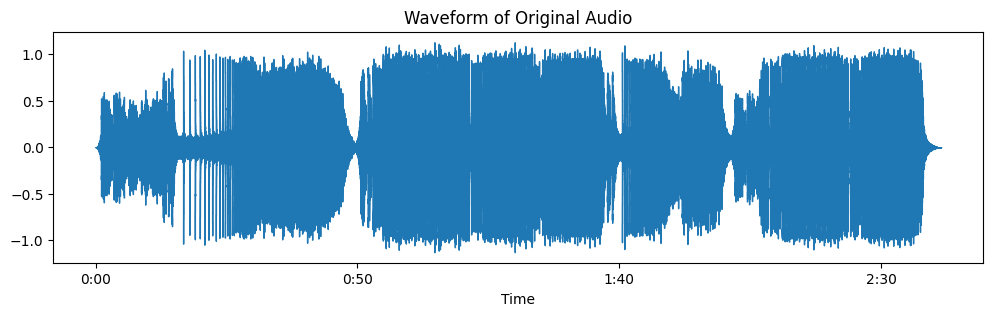

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y , sr = librosa.load("song.mp3" , sr= None)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Original Audio")
plt.show()